In [10]:
import pandas as pd

pickupline = pd.read_csv('C:\\Users\\ReDI\\Desktop\\KreativStorm\\Datasets\\PickUpLines.csv')

pickupline

,ParticipantNumber,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool,Contraceptive
0,1,1,2,3.25424,2,21,4,2,2
1,2,1,1,4.43760,2,19,4,3,1
2,3,1,1,4.43760,2,21,4,1,1
3,4,1,1,3.91988,2,19,4,3,2
4,5,2,2,3.99384,2,20,1,2,1
...,...,...,...,...,...,...,...,...,...
189,190,1,2,4.06780,2,23,4,1,2
190,191,1,2,3.99384,2,21,3,2,2
191,192,2,1,3.91988,2,20,5,3,2
192,193,2,1,4.32666,2,20,4,2,2


In [15]:
# checking for null and missing values in the column: PickUp
null_values = pickupline['PickUp'].isnull().sum()

missing_values = pickupline['PickUp'].isna().sum()

print(f"Number of null values: {null_values}")
print(f"Number of missing values: {missing_values}")


Number of null values: 0
Number of missing values: 0


In [16]:
# Number (sum) of non-null values in the column: PickUp
non_null_values = pickupline['PickUp'].notnull().sum()

print(f"Number of non-null values: {non_null_values}")


Number of non-null values: 194


In [21]:
# Number (sum) of specific values (1 and 2) in the column: PickUp
specific_value = 1
count_specific_value = (pickupline['PickUp'] == specific_value).sum()

print(f"Number of values equal to '{specific_value}': {count_specific_value}")


Number of values equal to '1': 120


In [14]:
# PickUp: 1: Cute-Direct   2: Direct-direct

# Scent   1: Perfume       2: No Perfume

# Receptivity:  Rating/ Reactions of person, higher means the more the method worked - Mean value

# Gender:  2 = Female    /   1 = Male

# Contraceptive   1= No   / 2 = Yes

# Ethnicity    1: white or european, 2: black or african, 3: eastern or asian, 4: hispanic, latino, spanish, 5: other

# YearInSchool   1:freshman, 2:sophomore, 3:junior, 4:senior

In [12]:
import pandas as pd

min_value = pickupline['Receptivity'].min()
max_value = pickupline['Receptivity'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: 2.4037
Maximum value: 5.0


In [13]:
pickupline.columns

Index(['ParticipantNumber', 'PickUp', 'Scent', 'Receptivity', 'Gender', 'Age',
       'Ethnicity', 'YearInSchool', 'Contraceptive'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


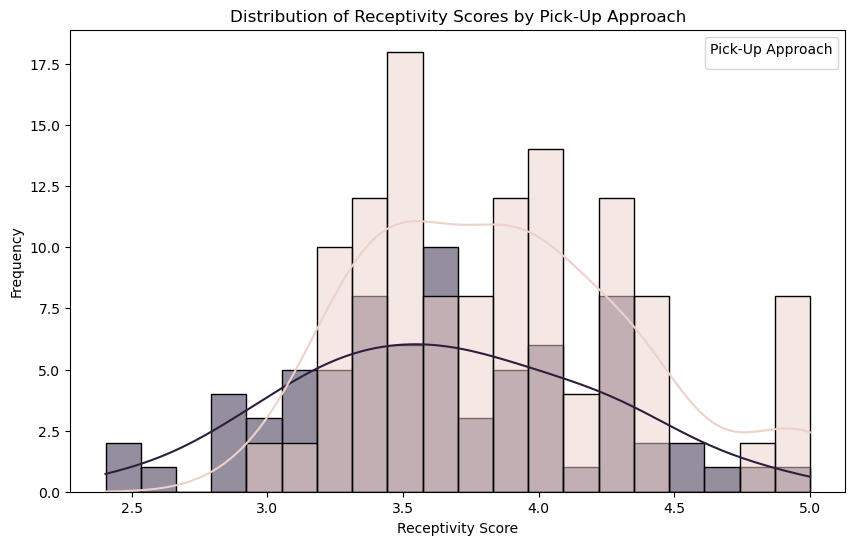

            mean   median       std
PickUp                             
1       3.863434  3.82743  0.498829
2       3.654452  3.66102  0.558799


In [22]:
# 3.	Are the scores in each cell independent? 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histograms for receptivity scores by pick-up approach
plt.figure(figsize=(10, 6))
sns.histplot(data=pickupline, x='Receptivity', hue='PickUp', bins=20, kde=True)
plt.title('Distribution of Receptivity Scores by Pick-Up Approach')
plt.xlabel('Receptivity Score')
plt.ylabel('Frequency')
plt.legend(title='Pick-Up Approach')
plt.show()

# Summary statistics for receptivity scores by pick-up approach
summary_stats = pickupline.groupby('PickUp')['Receptivity'].agg(['mean', 'median', 'std'])
print(summary_stats)


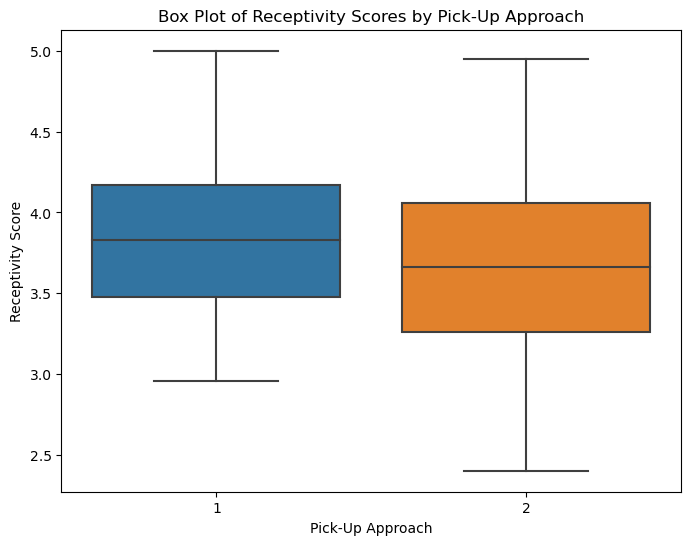

In [23]:
# 4.	Are there any significant outliers?

import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize distribution and identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='PickUp', y='Receptivity', data=pickupline)
plt.title('Box Plot of Receptivity Scores by Pick-Up Approach')
plt.xlabel('Pick-Up Approach')
plt.ylabel('Receptivity Score')
plt.show()


In [24]:
# 4.	Are there any significant outliers?


# Calculate interquartile range (IQR)
Q1 = pickupline['Receptivity'].quantile(0.25)
Q3 = pickupline['Receptivity'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = pickupline[(pickupline['Receptivity'] < lower_bound) | (pickupline['Receptivity'] > upper_bound)]
print("Potential outliers:")
print(outliers)


Potential outliers:
Empty DataFrame
Columns: [ParticipantNumber, PickUp, Scent, Receptivity, Gender, Age, Ethnicity, YearInSchool, Contraceptive]
Index: []


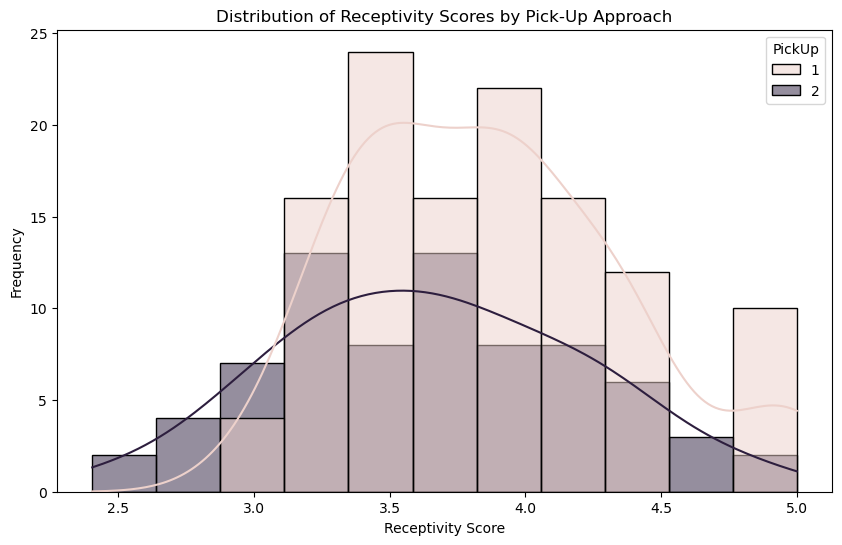

            mean   median       std
PickUp                             
1       3.863434  3.82743  0.498829
2       3.654452  3.66102  0.558799


In [28]:
# 5.	How is your dependent variable distributed in each cell?

import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms or density plots for receptivity scores by pick-up approach
plt.figure(figsize=(10, 6))
sns.histplot(data=pickupline, x='Receptivity', hue='PickUp', kde=True)
plt.title('Distribution of Receptivity Scores by Pick-Up Approach')
plt.xlabel('Receptivity Score')
plt.ylabel('Frequency')
plt.show()



# Summary statistics for receptivity scores by different pick-up approachs
summary_stats_2 = pickupline.groupby('PickUp')['Receptivity'].agg(['mean', 'median', 'std'])
print(summary_stats_2)


In [32]:
# Q5 and Q6
# Statistical and normallity tests

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Summary statistics for receptivity scores by pick-up approach
summary_stats = pickupline.groupby('PickUp')['Receptivity'].agg(['mean', 'median', 'std'])
display(summary_stats)

# Perform Shapiro-Wilk test for normality
shapiro_results = pickupline.groupby('PickUp')['Receptivity'].apply(lambda x: stats.shapiro(x.dropna()))
display("Shapiro-Wilk test results:")
display(shapiro_results)


,mean,median,std
PickUp,,,
1,3.863434,3.82743,0.498829
2,3.654452,3.66102,0.558799


'Shapiro-Wilk test results:'

PickUp
1    (0.9578617215156555, 0.000855224730912596)
2      (0.9907622933387756, 0.8713902235031128)
Name: Receptivity, dtype: object

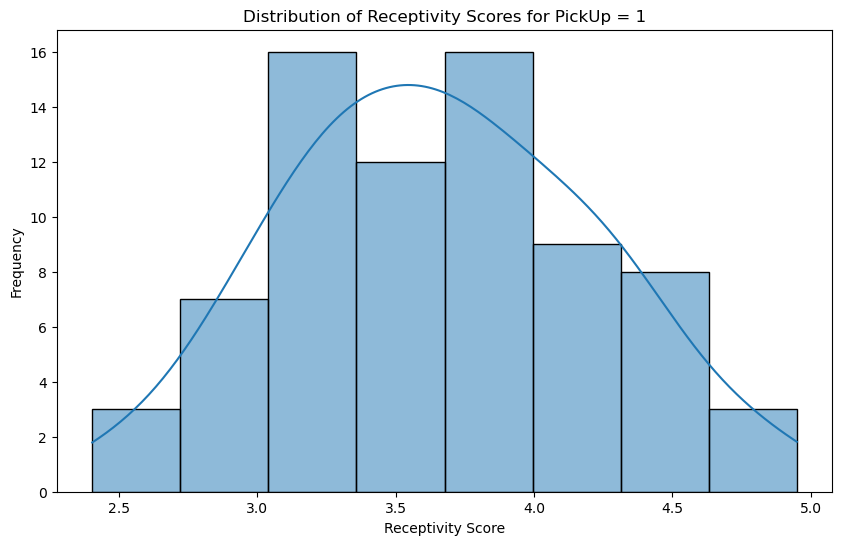

Summary Statistics for Receptivity Scores (PickUp = 1):
Mean: 3.6544516216216225
Median: 3.66102
Standard Deviation: 0.5587985168394705
Shapiro-Wilk Test Results (PickUp = 1):
Test Statistic: 0.9907622933387756
p-value: 0.8713902235031128


In [39]:
# Q5 and Q6
# i want to visually and statistically inspect the distribution of receptivity scores with respect to pickUp = 1 or 2
# also I want to know if it is normally distributed or not



import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Filter data for PickUp = 1
receptivity_pickup1 = pickupline[pickupline['PickUp'] == 2]['Receptivity'].dropna()

# Visual Inspection: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(receptivity_pickup1, kde=True)
plt.title('Distribution of Receptivity Scores for PickUp = 1')
plt.xlabel('Receptivity Score')
plt.ylabel('Frequency')
plt.show()

# Summary Statistics
mean_receptivity_pickup1 = receptivity_pickup1.mean()
median_receptivity_pickup1 = receptivity_pickup1.median()
std_receptivity_pickup1 = receptivity_pickup1.std()

print("Summary Statistics for Receptivity Scores (PickUp = 1):")
print("Mean:", mean_receptivity_pickup1)
print("Median:", median_receptivity_pickup1)
print("Standard Deviation:", std_receptivity_pickup1)

# Normality Test: Shapiro-Wilk
shapiro_statistic, shapiro_p_value = stats.shapiro(receptivity_pickup1)
print("Shapiro-Wilk Test Results (PickUp = 1):")
print("Test Statistic:", shapiro_statistic)
print("p-value:", shapiro_p_value)


In [41]:
# Q7 7.	Is there homogeneity or heterogeneity of variance?


from scipy.stats import levene

# Extract receptivity scores for each pick-up approach
receptivity_cute_direct = pickupline[pickupline['PickUp'] == 1]['Receptivity']
receptivity_direct_direct = pickupline[pickupline['PickUp'] == 2]['Receptivity']

# Perform Levene's test for homogeneity of variance
statistic, p_value = levene(receptivity_cute_direct, receptivity_direct_direct)

# Print the results
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of heterogeneity of variance.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of heterogeneity of variance.")

Levene's test statistic: 1.1706209151834523
p-value: 0.2806306999862532
Fail to reject the null hypothesis. There is no evidence of heterogeneity of variance.


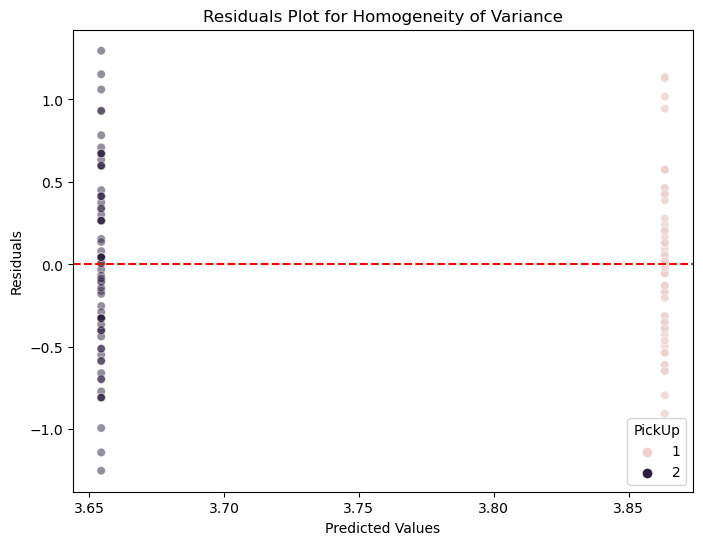

In [44]:
# Q7, visual inspection

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit a linear model to the data
model = sm.OLS.from_formula('Receptivity ~ C(PickUp)', data=pickupline)
result = model.fit()

# Get the residuals from the model
residuals = result.resid

# Create a plot of residuals against predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=result.fittedvalues, y=residuals, hue=pickupline['PickUp'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title('Residuals Plot for Homogeneity of Variance')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [45]:
# Q8 	What is the mean score of receptivity in the experimental condition (cute-direct)?




# Calculate the mean score of receptivity for the cute-direct pick-up approach
mean_receptivity_cute_direct = pickupline[pickupline['PickUp'] == 1]['Receptivity'].mean()

print("Mean score of receptivity in the cute-direct pick-up approach:", mean_receptivity_cute_direct)


Mean score of receptivity in the cute-direct pick-up approach: 3.863434


In [46]:
# Q9  9.	What is the mean score of receptivity in the control condition (direct-direct)?



# Calculate the mean score of receptivity for the direct-direct pick-up approach
mean_receptivity_direct_direct = pickupline[pickupline['PickUp'] == 2]['Receptivity'].mean()

print("Mean score of receptivity in the direct-direct pick-up approach:", mean_receptivity_direct_direct)


Mean score of receptivity in the direct-direct pick-up approach: 3.6544516216216225


In [47]:
# Q10  10.	What is your answer to RQ1? Report on the findings (no less than 150 words). Don’t forget to mention the assumptions.


from scipy.stats import mannwhitneyu

# Extract receptivity scores for the two pick-up approaches
receptivity_cute_direct_final = pickupline[pickupline['PickUp'] == 1]['Receptivity']
receptivity_direct_direct_final = pickupline[pickupline['PickUp'] == 2]['Receptivity']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(receptivity_cute_direct_final, receptivity_direct_direct_final)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of a significant difference in receptivity between the two pick-up approaches.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a significant difference in receptivity between the two pick-up approaches.")


Mann-Whitney U test statistic: 5344.0
p-value: 0.017311445349808854
Reject the null hypothesis. There is evidence of a significant difference in receptivity between the two pick-up approaches.


In [49]:
# Q10  o calculate an effect size measure for the difference in receptivity between the two pick-up approaches (cute-direct and direct-direct), 
# you can use Cohen's d or the rank-biserial correlation coefficient.
# Here's how you can calculate each of these effect size measures:


import numpy as np


# Calculate Cohen's d
mean_difference = receptivity_cute_direct.mean() - receptivity_direct_direct.mean()
n1 = len(receptivity_cute_direct)
n2 = len(receptivity_direct_direct)
variance_cute_direct = receptivity_cute_direct.var()
variance_direct_direct = receptivity_direct_direct.var()
pooled_sd = ((n1 - 1) * variance_cute_direct + (n2 - 1) * variance_direct_direct) / (n1 + n2 - 2)
cohens_d = mean_difference / np.sqrt(pooled_sd)

print("Cohen's d:", cohens_d)

# Calculate rank-biserial correlation coefficient
rank_biserial_corr = statistic / (n1 * n2)

print("Rank-Biserial Correlation Coefficient:", rank_biserial_corr)


Cohen's d: 0.40001111584515553
Rank-Biserial Correlation Coefficient: 0.6018018018018018


In [50]:
pickupline

,ParticipantNumber,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool,Contraceptive
0,1,1,2,3.25424,2,21,4,2,2
1,2,1,1,4.43760,2,19,4,3,1
2,3,1,1,4.43760,2,21,4,1,1
3,4,1,1,3.91988,2,19,4,3,2
4,5,2,2,3.99384,2,20,1,2,1
...,...,...,...,...,...,...,...,...,...
189,190,1,2,4.06780,2,23,4,1,2
190,191,1,2,3.99384,2,21,3,2,2
191,192,2,1,3.91988,2,20,5,3,2
192,193,2,1,4.32666,2,20,4,2,2


In [51]:
# 13.	Are the scores in each cell independent? 


import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame containing the dataset
# Create a contingency table
contingency_table = pd.crosstab(pickupline['Scent'], df['Receptivity'])

# Perform chi-square test for independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p)

# Perform regression analysis
# Dummy code the 'Scent' variable (1 for perfume, 0 for no perfume)
pickupline['Perfume'] = pickupline['Scent'].map({1: 1, 2: 0})

# Fit a regression model
model = ols('Receptivity ~ Perfume + Gender + Age + Ethnicity', data=pickupline).fit()

# Print regression summary
print(model.summary())


Chi-square test statistic: 119.9444939628273
p-value: 2.8694316999373366e-05
                            OLS Regression Results                            
Dep. Variable:            Receptivity   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.707
Date:                Fri, 16 Feb 2024   Prob (F-statistic):              0.167
Time:                        20:49:28   Log-Likelihood:                -149.37
No. Observations:                 194   AIC:                             306.7
Df Residuals:                     190   BIC:                             319.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

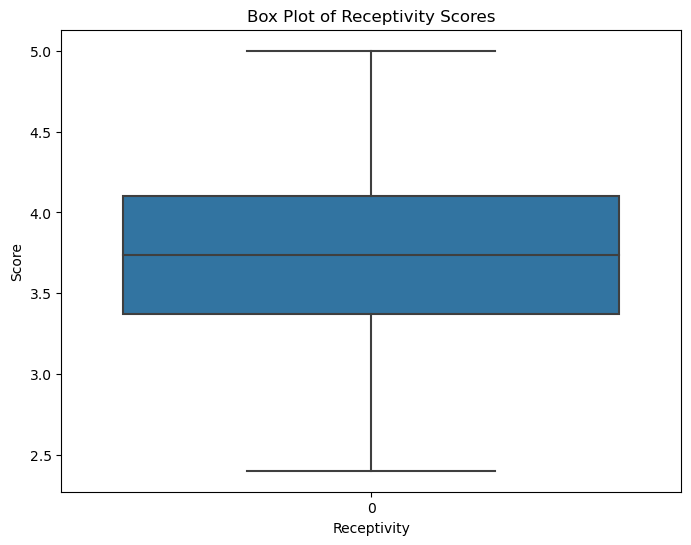

Identified Outliers:
Empty DataFrame
Columns: [ParticipantNumber, PickUp, Scent, Receptivity, Gender, Age, Ethnicity, YearInSchool, Contraceptive, Perfume]
Index: []


In [52]:
# Q14
# 14.	Are there any significant outliers? 


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset
# Select the column(s) containing the data you want to analyze for outliers
data_to_analyze = pickupline['Receptivity']

# Calculate z-scores for each data point
z_scores = (data_to_analyze - data_to_analyze.mean()) / data_to_analyze.std()

# Define a threshold for identifying outliers (e.g., z-score > 3 or < -3)
outlier_threshold = 3

# Identify outliers based on z-scores
outliers = pickupline[np.abs(z_scores) > outlier_threshold]

# Plot box plot to visualize the distribution and identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_to_analyze)
plt.title('Box Plot of Receptivity Scores')
plt.xlabel('Receptivity')
plt.ylabel('Score')
plt.show()

# Display the identified outliers
print("Identified Outliers:")
print(outliers)


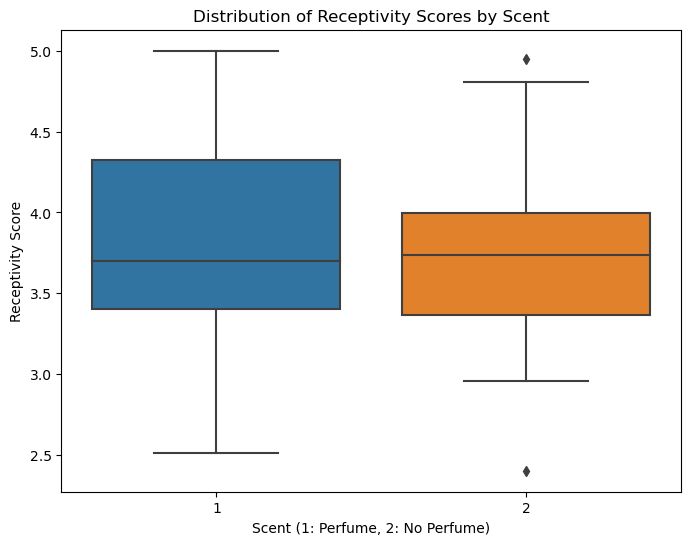

           mean   median       std
Scent                             
1      3.856883  3.69800  0.603089
2      3.699174  3.73498  0.420563


In [54]:
# 15.	How is your dependent variable distributed in each cell?


import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize the distribution of 'Receptivity' scores for each level of 'Scent'
plt.figure(figsize=(8, 6))
sns.boxplot(data=pickupline, x='Scent', y='Receptivity')
plt.title('Distribution of Receptivity Scores by Scent')
plt.xlabel('Scent (1: Perfume, 2: No Perfume)')
plt.ylabel('Receptivity Score')
plt.show()


# Calculate summary statistics for 'Receptivity' scores by 'Scent'
summary_stats = pickupline.groupby('Scent')['Receptivity'].agg(['mean', 'median', 'std'])

# Display the summary statistics
print(summary_stats)



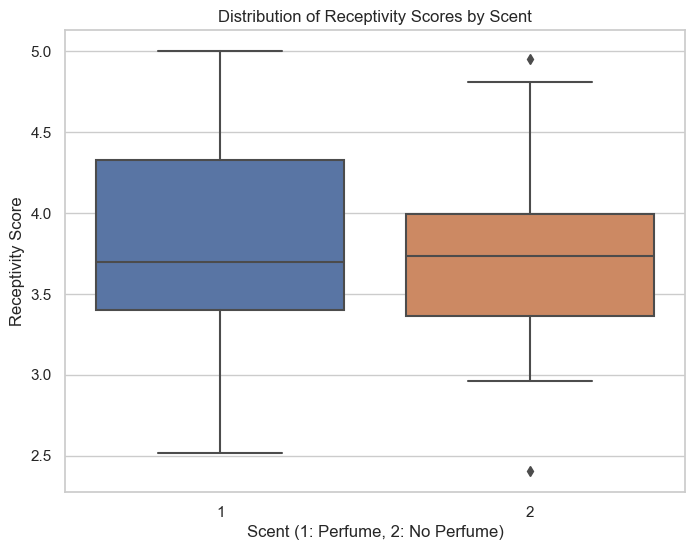

In [55]:
#Q15


import seaborn as sns
import matplotlib.pyplot as plt

# Set style and context for seaborn
sns.set(style="whitegrid")

# Create side-by-side box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Scent', y='Receptivity', data=pickupline)
plt.title('Distribution of Receptivity Scores by Scent')
plt.xlabel('Scent (1: Perfume, 2: No Perfume)')
plt.ylabel('Receptivity Score')
plt.show()


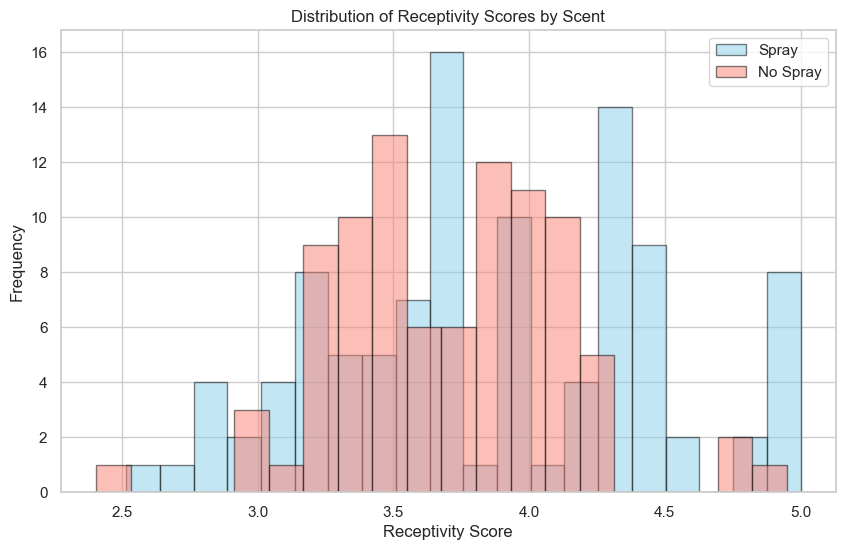

In [57]:
# 16.	Do you need to perform any transformations? visial inspection


import matplotlib.pyplot as plt

# Create histograms to visualize the distribution of 'Receptivity' scores for each level of 'Scent'
plt.figure(figsize=(10, 6))
plt.hist(pickupline[pickupline['Scent'] == 1]['Receptivity'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Spray')
plt.hist(pickupline[pickupline['Scent'] == 2]['Receptivity'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='No Spray')
plt.title('Distribution of Receptivity Scores by Scent')
plt.xlabel('Receptivity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [58]:
#16.	Do you need to perform any transformations?  Normality Tests - Shapiro-Wilk Test:


from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
statistic_spray, p_value_spray = shapiro(pickupline[pickupline['Scent'] == 1]['Receptivity'])
statistic_no_spray, p_value_no_spray = shapiro(pickupline[pickupline['Scent'] == 2]['Receptivity'])

print("Shapiro-Wilk Test for Spray:")
print("Test Statistic:", statistic_spray)
print("p-value:", p_value_spray)

print("\nShapiro-Wilk Test for No Spray:")
print("Test Statistic:", statistic_no_spray)
print("p-value:", p_value_no_spray)


Shapiro-Wilk Test for Spray:
Test Statistic: 0.9737378358840942
p-value: 0.036449555307626724

Shapiro-Wilk Test for No Spray:
Test Statistic: 0.9701603651046753
p-value: 0.03629191964864731


In [59]:
#16.	Do you need to perform any transformations? Homogeneity of Variance - Levene's Test:


from scipy.stats import levene

# Perform Levene's test for homogeneity of variance
statistic, p_value = levene(pickupline[pickupline['Scent'] == 1]['Receptivity'], pickupline[pickupline['Scent'] == 2]['Receptivity'])

print("Levene's Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)



Levene's Test:
Test Statistic: 12.75253194077462
p-value: 0.0004493446247472522


In [60]:
# 18.	What is the mean score of receptivity in the experimental condition?


experimental_mean = pickupline[pickupline['Scent'] == 1]['Receptivity'].mean()
print("Mean score of receptivity in the experimental condition:", experimental_mean)


Mean score of receptivity in the experimental condition: 3.856883461538462


In [61]:
# 19.	What is the mean score of receptivity in the control condition?


control_mean = pickupline[pickupline['Scent'] == 2]['Receptivity'].mean()
print("Mean score of receptivity in the control condition:", control_mean)


Mean score of receptivity in the control condition: 3.6991735555555545


In [62]:
# 20.	What is your answer to RQ2? Report on the findings (no less than 150 words). Don’t forget to mention the assumptions

# performing Mann-Whitney U test



from scipy.stats import mannwhitneyu

# Extract receptivity scores for the two conditions (with and without spray)
receptivity_with_spray = pickupline[pickupline['Scent'] == 1]['Receptivity']
receptivity_without_spray = pickupline[pickupline['Scent'] == 2]['Receptivity']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(receptivity_with_spray, receptivity_without_spray)

print("Mann-Whitney U test statistic:", statistic)
print("p-value:", p_value)


Mann-Whitney U test statistic: 5400.0
p-value: 0.06487918815656105


In [66]:
# Q23

from scipy.stats import chi2_contingency

# Create a contingency table for the frequencies of the combination of variables
contingency_table = pd.crosstab(index=pickupline['Scent'], columns=pickupline['PickUp'])

# Perform chi-square test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p_value)


Chi-square test statistic: 1.288518157580657
p-value: 0.2563212150101907


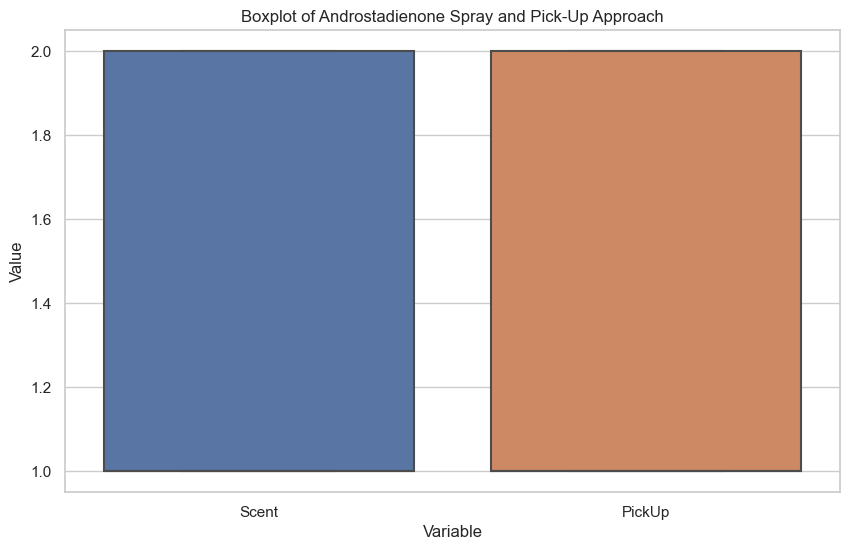

Significant outliers in attractiveness effect:
Empty DataFrame
Columns: [ParticipantNumber, PickUp, Scent, Receptivity, Gender, Age, Ethnicity, YearInSchool, Contraceptive, Perfume]
Index: []


In [70]:
# Q24


import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each relevant variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=pickupline[['Scent', 'PickUp']])
plt.title('Boxplot of Androstadienone Spray and Pick-Up Approach')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()


import numpy as np

# Calculate z-scores for the variable representing attractiveness effect
attractiveness_effect_z_scores = np.abs((pickupline['Receptivity'] - pickupline['Receptivity'].mean()) / pickupline['Receptivity'].std())

# Define threshold for identifying outliers (e.g., z-score greater than 3)
threshold = 3

# Identify outliers
significant_outliers = pickupline[attractiveness_effect_z_scores > threshold]

# Print significant outliers
print("Significant outliers in attractiveness effect:")
print(significant_outliers)



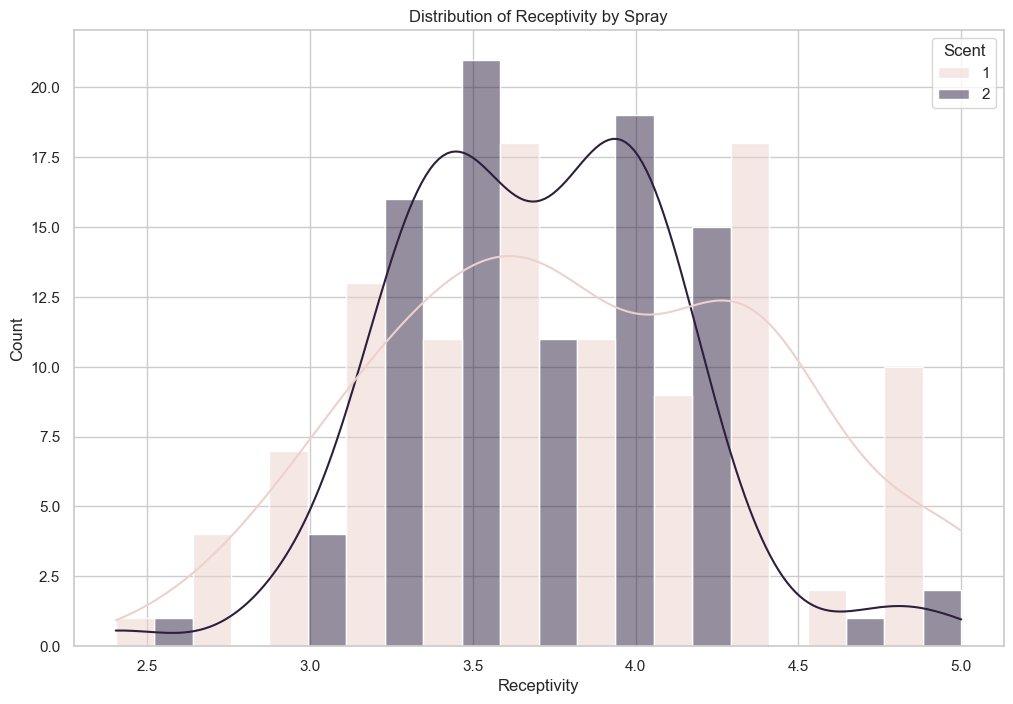

In [74]:
#   25.	How is your dependent variable distributed in each cell?



import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms or density plots for attractiveness effect by androstadienone spray and pick-up approach
plt.figure(figsize=(12, 8))
sns.histplot(data=pickupline, x='Receptivity', hue='Scent', multiple='dodge', kde=True)
plt.title('Distribution of Receptivity by Spray')
plt.xlabel('Receptivity')
plt.ylabel('Count')
plt.show()


In [77]:
# Q25 Compute summary statistics for attractiveness effect by androstadienone spray and pick-up approach
summary_stats = pickupline.groupby(['Scent', 'PickUp'])['Receptivity'].agg(['mean', 'median', 'std'])

print(summary_stats)


                  mean   median       std
Scent PickUp                             
1     1       4.037497  3.99384  0.569636
      2       3.610593  3.66102  0.564283
2     1       3.689371  3.73498  0.340249
      2       3.718778  3.66102  0.553797


In [78]:
# Q 26   .	Do you need to perform any transformations?


from scipy.stats import shapiro, levene

# Test for normality
shapiro_test = shapiro(pickupline['Receptivity'])
print("Shapiro-Wilk Test for Normality:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

# Test for homogeneity of variance
levene_test = levene(pickupline['Receptivity'], pickupline['Scent'], pickupline['PickUp'])
print("\nLevene's Test for Homogeneity of Variance:")
print("Test Statistic:", levene_test.statistic)
print("p-value:", levene_test.pvalue)



Shapiro-Wilk Test for Normality:
Test Statistic: 0.9844916462898254
p-value: 0.03101087361574173

Levene's Test for Homogeneity of Variance:
Test Statistic: 1.6949316109939083
p-value: 0.1845215083179482


In [81]:
# 28.	Is there any interaction between the two factors?
    
# To determine whether there is an interaction between the two factors (androstadienone spray and pick-up approach),
# you can perform a two-way ANOVA (Analysis of Variance) with interaction. 
    
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('Receptivity ~ C(Scent) * C(PickUp)', data=pickupline).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                       sum_sq     df         F    PR(>F)
C(Scent)             1.515279    1.0  5.928695  0.015820
C(PickUp)            2.314331    1.0  9.055073  0.002975
C(Scent):C(PickUp)   2.329234    1.0  9.113383  0.002886
Residual            48.560936  190.0       NaN       NaN
